Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Simulate Clustering Data

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [45]:
n_samples = 800
np.random.seed(10)
cluster_sets = []

# 2 clusters
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs_2cen_samestd = datasets.make_blobs(
    n_samples=n_samples, n_features=2, 
    cluster_std=[1.5, 1.5], centers=2, random_state=10
)
blobs_2cen_diffstd = datasets.make_blobs(
    n_samples=n_samples, n_features=2, 
    cluster_std=[0.8, 2.5], centers=2, random_state=10
)
cluster_sets.extend([noisy_circles, noisy_moons, blobs_2cen_samestd, blobs_2cen_diffstd])

# 3 ~ 20 clusters, cluster std are randomly generated
cluster_ct = list(range(3, 21))
for cct in cluster_ct:
    blobs = datasets.make_blobs(
        n_samples=n_samples, n_features=2, 
        cluster_std=np.random.randint(low=10, high=50, size=cct)/10, centers=cct, random_state=10
    )
    cluster_sets.append(blobs)

len(cluster_sets)

22

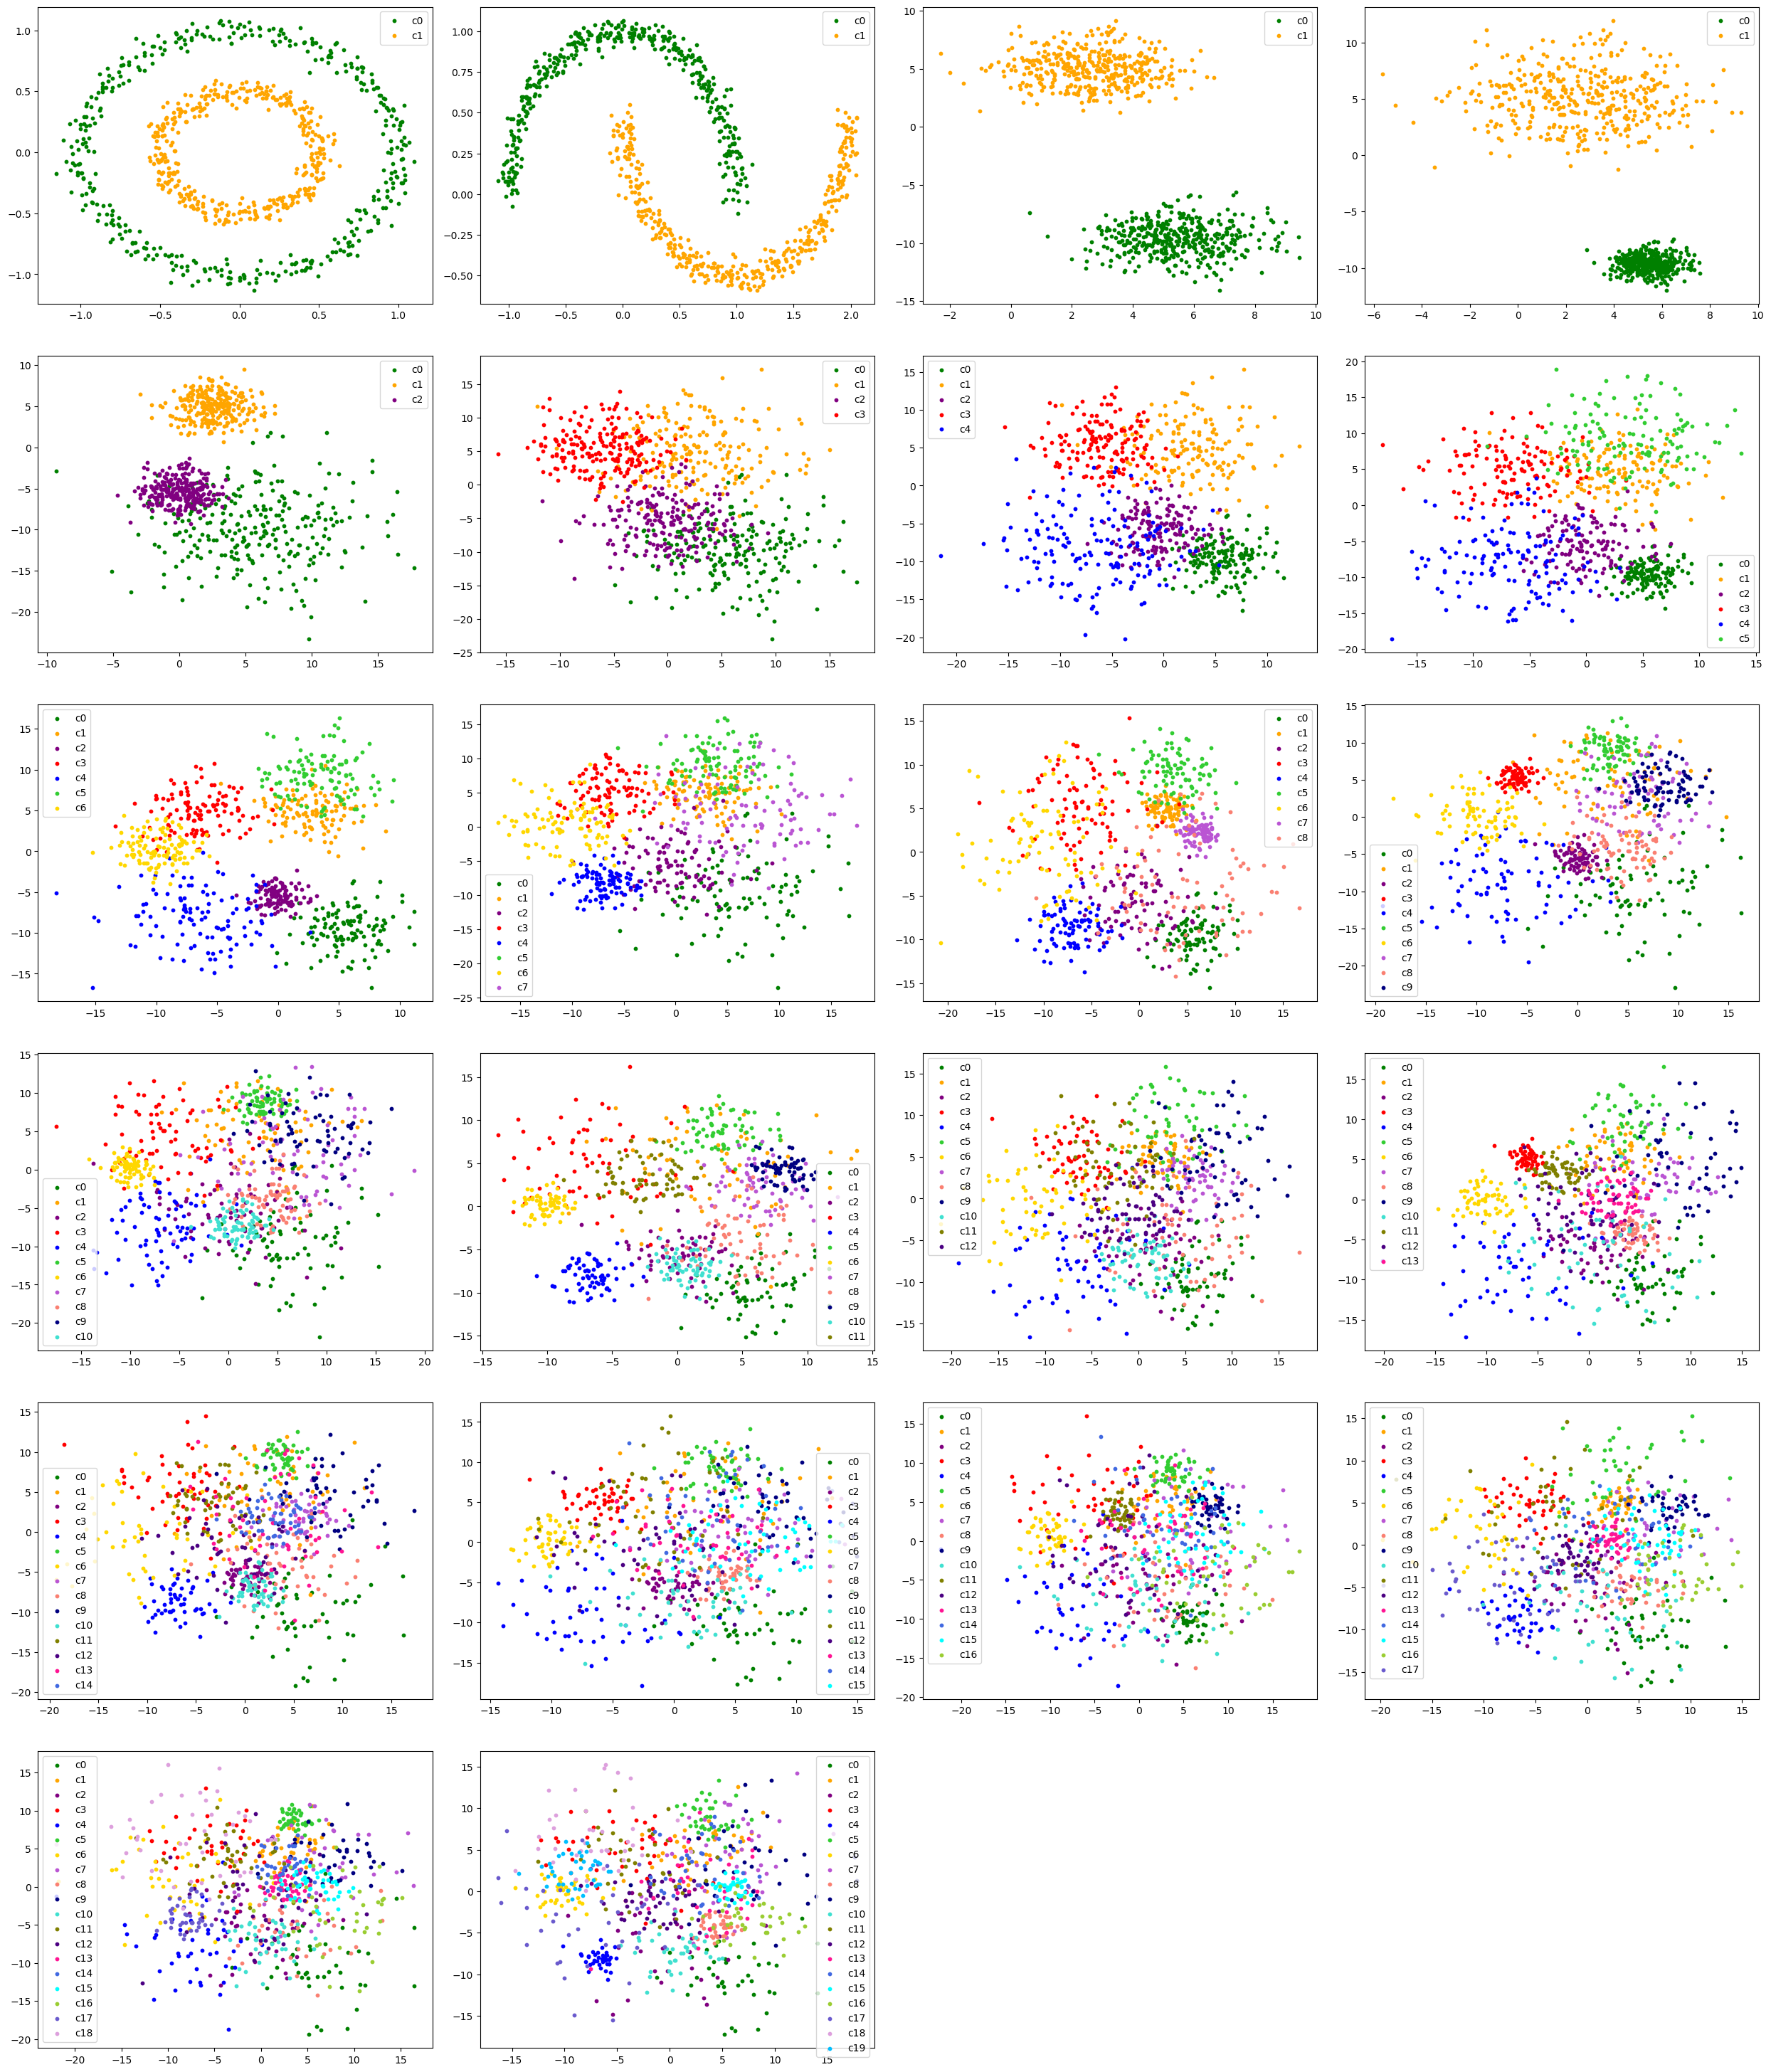

In [46]:
i = 0
n_rows = 6
n_cols = 4
colors = ['green', 'orange', 'purple', 'red', 'blue', 'limegreen', 'gold', 'mediumorchid', 'salmon', 'navy', 
         'turquoise', 'olive', 'indigo', 'deeppink', 'royalblue', 'cyan', 'yellowgreen', 'slateblue', 'plum', 'deepskyblue']

fig=plt.figure(figsize=(25, 30))
for cluster_set in cluster_sets:
    i += 1
    ax=fig.add_subplot(n_rows,n_cols,i) 
    X, y = cluster_set[0], cluster_set[1]
    unique_ys = np.unique(y)
    for j in unique_ys:
        plt.scatter(X[y == j, 0], X[y == j, 1], color=colors[j], s=10, label=f'c{j}')
    plt.legend()
    
fig.tight_layout()
plt.show()